In [32]:
##View os and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import os
print (os)

<module 'os' from 'C:\\Users\\14029\\anaconda3\\lib\\os.py'>


In [10]:
##Read in spreadsheet and view info
ppg = pd.read_csv("ppg2008.csv")
ppg.head(10)

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
5,Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,...,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
6,Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,...,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
7,Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,...,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
8,Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,...,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7
9,Carmelo Anthony,66,34.5,22.8,8.1,18.3,0.443,5.6,7.1,0.793,...,2.6,0.371,1.6,5.2,6.8,3.4,1.1,0.4,3.0,3.0


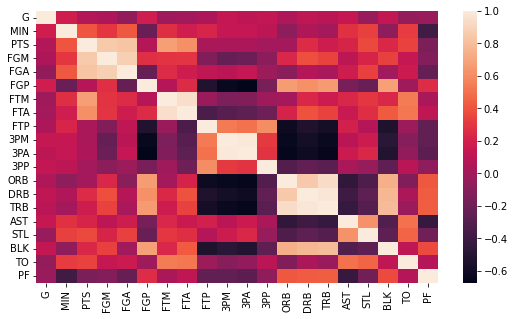

In [11]:
##Using heatmap to figure out which variables are correlated
plt.figure(figsize=(9,5))
sns.heatmap(df.corr())
plt.show()

In [25]:
##Setting up Spacial Chart
##Read in spreadsheet and view info
costco = pd.read_csv("costcos-geocoded.csv")
costco.head(10)

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217
5,4125 DeBarr Road,Anchorage,Alaska,99508-3115,61.210815,-149.804337
6,3911 Highway 69,Prescott,Arizona,86301-6717,34.548993,-112.395427
7,3901 West Costco Drive,Tucson,Arizona,85741-2864,32.326218,-111.049161
8,6255 East Grant Road,Tucson,Arizona,85712-5834,32.252219,-110.859554
9,17550 N. 79th Ave.,Glendale,Arizona,85308-8711,33.643277,-112.233474


In [27]:
##View data type
costco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    417 non-null    object 
 1   City       417 non-null    object 
 2   State      417 non-null    object 
 3   Zip Code   417 non-null    object 
 4   Latitude   417 non-null    float64
 5   Longitude  417 non-null    float64
dtypes: float64(2), object(4)
memory usage: 19.7+ KB


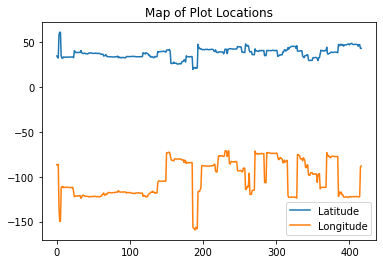

In [30]:
fig, ax = plt.subplots()
costco.plot(ax=ax)
plt.title("Map of Costco Locations")
plt.show()

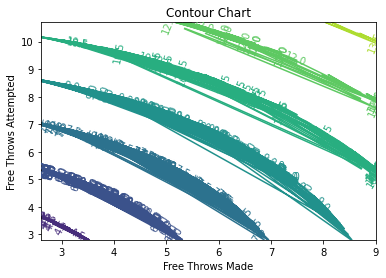

In [36]:
##Setting up Countour Chart
%matplotlib inline

##define function

def f(x, y):

    return np.sqrt(x**2 + y**2)

##Showing free throws attempts vs free throws made
x = np.array(ppg['FTM']) ##Made
y = np.array(ppg['FTA']) ##Attempted

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Contour Chart')
plt.xlabel('Free Throws Made')
plt.ylabel('Free Throws Attempted')
plt.show()